In [40]:
dur = {}
#lst.remove('')

In [41]:
import multiprocessing
from multiprocessing import Pool
import tqdm
import time
import os
from heapq import heappush, heappop, heapify
from collections import defaultdict
from bitarray import bitarray
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import matplotlib
from PIL import Image as im
from tqdm.notebook import tqdm
import pymp
from joblib import Parallel, delayed
import ray

In [42]:
def _foo(nae):
    print(my_number)
    return 1

def compretion(name):
    img='photos/'+name
    image = cv2.imread(img)
    #plt.imshow(image)
    #a = im.fromarray(image)
    #print(image)
    #print("====")
    #print(len(image))
    #print(len(image[0]))
    #print(len(image[0][0]))
    #M = image.shape[0]
    #N = image.shape[1]
    #imageR=np.zeros([M,N])
    #imageB=np.zeros([M,N])
    #imageG=np.zeros([M,N])
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgshape = image.shape
    #print(imgshape)
    image = np.reshape(image, (1, imgshape[0]*imgshape[1]*imgshape[2]))
    #print(len(image[0]))
    #print(len(image), "a")
    image = image.tolist()[0]
    #print(len(image), "a")
    # image = "HAPPY HAPPY"
    freq_lib = defaultdict(int)    # generate a default library
    for ch in image:                # count each letter and record into the frequency library 
        freq_lib[ch] += 1
    heap = [[fq, [sym, ""]] for sym, fq in freq_lib.items()]  # '' is for entering the huffman code later
    heapify(heap) # transform the list into a heap tree structure
    while len(heap) > 1:
        right = heappop(heap)  # heappop - Pop and return the smallest item from the heap
    #     print('right = ', right)
        left = heappop(heap)
    #     print('left = ', left)

        for pair in right[1:]:  
            pair[1] = '1' + pair[1]   # add one to all the right note
        for pair in left[1:]:  
            pair[1] = '0' + pair[1]   # add zero to all the left note
        heappush(heap, [right[0] + left[0]] + right[1:] + left[1:])  # add values onto the heap. Eg. h = []; heappush(h, (5, 'write code')) --> h = [(5, 'write code')]
    huffman_list = right[1:] + left[1:]
    #print(len(huffman_list),"f")
    huffman_dict = {a[0]:bitarray(str(a[1])) for a in huffman_list}
    #print(len(huffman_dict),"s")
    encoded_image = bitarray()
    encoded_image.encode(huffman_dict, image)
    with open('bin/'+name+'.bin', 'wb') as w:
        encoded_image.tofile(w)
    huffman_dict['imgshape'] = [imgshape[0],imgshape[1],imgshape[2]]
    huffman_dict['encoded_image'] = len(encoded_image)
    #print(huffman_dict)

    a_file = open('dict/'+name+".pkl", "wb")
    pickle.dump(huffman_dict, a_file)
    a_file.close()
    #print(name, "compretion completed...")
    #return a

if __name__ == '__main__':
    lst = os.listdir('photos/')
    start_time = time.time()
    for i in tqdm(range(len(lst))):
        compretion(lst[i])
    print("--- %s seconds ---" % (time.time() - start_time))
    dur["Series-compretion"] = time.time() - start_time


--- 80.51826095581055 seconds ---


In [43]:
def decompretion(name):
    decoded_out = bitarray()
    a_file = open('dict/'+name+".pkl", "rb")
    huffman_dict = pickle.load(a_file)
    #print(output)
    
    imgshape = huffman_dict.pop("imgshape")
    e_i = huffman_dict.pop("encoded_image")
    padding = 8 - (e_i % 8)
    
    with open('bin/'+name+'.bin', 'rb') as r:
        decoded_out.fromfile(r)
    
    decoded_out = decoded_out[:-padding] # remove padding
    decoded_out = decoded_out.decode(huffman_dict) 
    # decoded_text = ''.join(decoded_text)

    # print(decoded_out)

    decoded_out = np.array(decoded_out);
    output = np.reshape(decoded_out, (imgshape[0], imgshape[1] , imgshape[2]))
    #plt.imshow(output, cmap='gray')
    #matplotlib.image.imsave('decomp/'+name, output)
    #output.save('decomp/'+name)
    cv2.imwrite('decomp/'+name, output)
    #plt.imshow(output)
    #im.fromarray(output)
    #print(name, "de-compretion completed...")

if __name__ == '__main__':
    lst = os.listdir('photos/')
    #lst.remove('')
    start_time = time.time()
    for j in tqdm(range(len(lst))):
        decompretion(lst[j])
    print("--- %s seconds ---" % (time.time() - start_time))
    dur["Series-decompretion"] = time.time() - start_time


--- 62.3877854347229 seconds ---


Threading

In [44]:
start_time = time.time()
#lst = lst[:10]
with pymp.Parallel(2) as p:
    for i in p.range(0, len(lst)//2):
        compretion(lst[i])

    for i in p.range(len(lst)//2, len(lst)):
        compretion(lst[i])
print("--- %s seconds ---" % (time.time() - start_time))
dur["Threading-compretion"] = time.time() - start_time

Exception: Pymp relies on full 'fork' support by the operating system. You seem to be using Windows, which unfortanetly does not do this.

In [45]:
start_time = time.time()
#lst = lst[:10]
with pymp.Parallel(2) as p:
    for i in p.range(0, len(lst)//2):
        decompretion(lst[i])

    for i in p.range(len(lst)//2, len(lst)):
        decompretion(lst[i])
print("--- %s seconds ---" % (time.time() - start_time))
dur["Threading-decompretion"] = time.time() - start_time

Exception: Pymp relies on full 'fork' support by the operating system. You seem to be using Windows, which unfortanetly does not do this.

Multi Processing (with 2 processors)

In [46]:
processors = 2

In [47]:
from test import multi_compretion

In [48]:
import os
lst = os.listdir('photos/')
#lst.remove('')
#print(lst)
dur["2 Processors compretion"] = multi_compretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:37<00:00,  1.59it/s]


--- 37.8402042388916 seconds ---


In [49]:
from test2 import multi_decompretion

In [50]:
lst = os.listdir('photos/')
#lst.remove('')
#print(lst)
dur["2 Processors decompretion"] = multi_decompretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:33<00:00,  1.83it/s]

--- 33.404603481292725 seconds ---


Multi Processing (with 4 processors)

In [51]:
processors = 4

In [52]:
lst = os.listdir('photos/')
#lst.remove('')
#lst.remove('')
#print(lst)
dur["4 Processors compretion"] = multi_compretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:25<00:00,  2.36it/s]


--- 25.603647232055664 seconds ---


In [53]:
lst = os.listdir('photos/')
#lst.remove('')
#print(lst)
dur["4 Processors decompretion"] = multi_decompretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:22<00:00,  2.71it/s]


--- 22.713435888290405 seconds ---


Multi Processing (with 8 processors)

In [54]:
processors = 8

In [55]:
lst = os.listdir('photos/')
#lst.remove('')
#print(lst)
dur["8 Processors compretion"] = multi_compretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:22<00:00,  2.69it/s]


--- 22.72270679473877 seconds ---


In [56]:
lst = os.listdir('photos/')
#lst.remove('')
#print(lst)
dur["8 Processors decompretion"] = multi_decompretion(lst,processors)

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:19<00:00,  3.14it/s]


--- 19.663806438446045 seconds ---


Joblib

In [57]:
lst = os.listdir('photos/')
#lst.remove('')

start_time = time.time()
result = Parallel(n_jobs=2)(delayed(compretion)(lst[i]) for i in range(len(lst)))
print("--- %s seconds ---" % (time.time() - start_time))
dur["Joblib-compretion"] = time.time() - start_time

--- 47.81302189826965 seconds ---


In [58]:
lst = os.listdir('photos/')
#lst.remove('')

start_time = time.time()
result = Parallel(n_jobs=2)(delayed(decompretion)(lst[i]) for i in range(len(lst)))
print("--- %s seconds ---" % (time.time() - start_time))
dur["Joblib-decompretion"] = time.time() - start_time

--- 34.929964780807495 seconds ---


Ray

In [59]:
@ray.remote
def ray_predict(image):
    return compretion(image)

In [60]:
lst = os.listdir('photos/')
#lst.remove('')
ray.init(num_cpus=2)

start_time = time.time()
result = ray.get([ray_predict.remote(lst[i]) for i in range(len(lst))])
ray.shutdown()

print("--- %s seconds ---" % (time.time() - start_time))
dur["ray-compretion"] = time.time() - start_time

2021-05-20 11:34:12,441	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8265


--- 47.59947323799133 seconds ---


In [61]:
@ray.remote
def ray_decompretion(image):
    return decompretion(image)

In [62]:
lst = os.listdir('photos/')
#lst.remove('')
ray.init(num_cpus=2)

start_time = time.time()
result = ray.get([ray_decompretion.remote(lst[i]) for i in range(len(lst))])
ray.shutdown()

print("--- %s seconds ---" % (time.time() - start_time))
dur["ray-decompretion"] = time.time() - start_time

2021-05-20 11:35:12,555	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8265


--- 36.26817297935486 seconds ---


[80.51826095581055, 0, 47.814014196395874, 47.59947323799133, 37.8402042388916, 25.603647232055664, 22.72370433807373]
[62.3877854347229, 0, 34.930962324142456, 36.26817297935486, 33.404603481292725, 22.714399337768555, 19.663806438446045]
['Series', 'Threading(2)', 'joblib(2)', 'ray(2)', 'Multi-Proessing(2)', 'Multi-Proessing(4)', 'Multi-Proessing(8)']


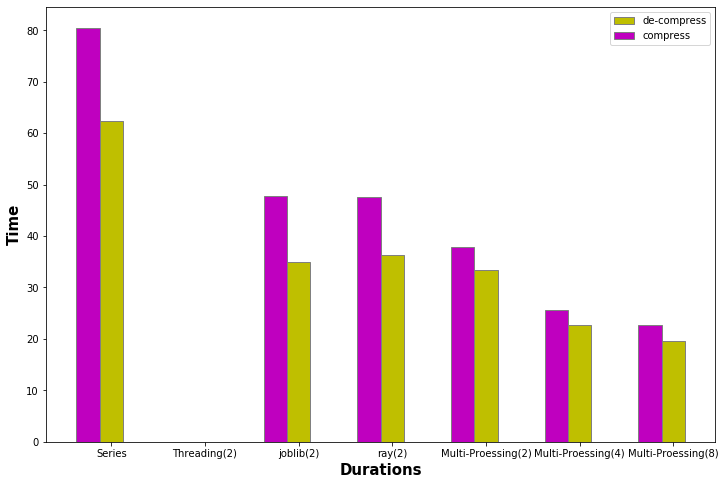

In [64]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
compress = [dur["Series-compretion"], dur["Threading-compretion"], dur["Joblib-compretion"], dur["ray-compretion"], dur["2 Processors compretion"],dur["4 Processors compretion"],dur["8 Processors compretion"]]
decompress = [dur["Series-decompretion"], dur["Threading-decompretion"], dur["Joblib-decompretion"], dur["ray-decompretion"], dur["2 Processors decompretion"],dur["4 Processors decompretion"],dur["8 Processors decompretion"]]
types = ['Series', 'Threading(2)','joblib(2)', 'ray(2)','Multi-Proessing(2)','Multi-Proessing(4)','Multi-Proessing(8)']

print(compress)
print(decompress)
print(types)

# Set position of bar on X axis
br1 = np.arange(len(compress))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br2, decompress, color ='y', width = barWidth,
        edgecolor ='grey', label ='de-compress')
plt.bar(br1, compress, color ='m', width = barWidth,
        edgecolor ='grey', label ='compress')
 
# Adding Xticks
plt.xlabel('Durations', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(compress))],types)
 
plt.legend()
plt.show()

In [63]:
dur["Threading-compretion"] = 0
dur["Threading-decompretion"] = 0

In [ ]:
import requests

os.mkdir('photos')

lst_urls = ["https://i.imgur.com/ExdKOOz.png","https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885__340.jpg","https://images.unsplash.com/photo-1541963463532-d68292c34b19?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8&w=1000&q=80","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUWFRgVFRYZGBgaGhgcHRwaGhoZGB4cGhoZHBwaGRocIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHxISHzQsJSw3NDQ2NjQ2NjQ0NDQ0NDQ0NDQ0NDQ0NjQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALcBEwMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAADBAIFAAEGB//EAD0QAAIBAgQDBgQDBgcAAwEAAAECEQADBBIhMQVBUQYTImFxgTKRobEUwfAHQlJi0eEjcoKSosLxJLLDFv/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwQABf/EACoRAAICAgICAQMEAgMAAAAAAAABAhEDIRIxQVETBGFxIoGR4VKhI8HR/9oADAMBAAIRAxEAPwDg10qSuaWVCOdGQmaibUOIw25085C6A61Xhum/WtoctKy0JqMWqTb9+PwPIW3ptL52JNLZoUHqNKlaQzmnqPpUml5KxxRWpOtWvP7BmxBXYmrjgnFSjB4mBG9UrqdCRpT/AA7Dq3OKm6WzM0n2dHj+N27qwUIYbHSgWQCJqrvYVgd9KcsxyNQyxcnditKqQ81sxpVRxKwWWG2men63qzBJ50DH2SwCjeuja7GhOUJKUXTRWWSAAuwFWlu9Aml24cw33ra2WHKklsWcnJ8n2xm3iJPrVnfw7W4DRJ5T9fbSqyy7WyHUCVncSNo2pV8XcuOWZpP5eXQUJRTXb7BHV6Le6k60VLelLopyedbRnArkti0Ee4QYoWKRiKKjyKUxmHxIbPacMOaPAHsQP7+dWii+LGpabS/JBLEbipfiUAPl0En5Dem8SdNoqnxfhGYU2kzo1eyVnHJceFOk66RVw7CNKoMCmY5qugsLT3Z2VxcriqXorr01tEOWaO6g60VmCpQoBTMk3FFXVm1zquwtgklzuas0MCiBmMag5qIYzRHTSnrQtECoIpDG4LMInSdaYYmlcDig7PB0kAfKNPlXJNlY4pSi5LpV/s53E4U96UjmP9oH/tKG1Ac+Z+8V0uIs+N3O8QPQCqq/b/wlAGrKNfXWmQDm7jmTWVepw8RtWV1gopPw5FSHSnLlkhZmhC3mNVTtC0EwqDmaN3Y61psPlEzWgOtIxhnDIII3NTcnkfat2HCzI3Ebx6Hz9KLYUFgN6R+zSsMXi58lfoVxGIc/FpTvDbhCZiw3iJ8XsOlFxuHA1NCw2DznTSktNGceOKzbmKZwbKQCDVO1uDB5Gm7B5roOQpZJUVlDGoJp232vR0TLlAI1o+EZfibeqnCYg7vrVnbuI3rUapmag+JvKaWuuIoGJwrEgg6UyuGJFc0Bo3hnUgqaWbCAExR7dnI2p3qV8qWkUGggw5QUyhJWqXivHbNpsrHMRvHL1NVl3toBoiaA8p9tSI9qrHHJ+AWkdaiEUZ2MVxtvtiXdYAgxIO/nXW3bgdA6agin4OPYU7IYkiN6puJLIgb0+UaJpbCLndvLSlfYy0D4cFSAzAFjCgmJ9PmKvLmELDQH2FI3cCmdHZTK7CdAd5irvD4zKKZNLsbIoqKce63+SmfCEClxaM67Cr0kOxMQKUfD6muEUvYmq8hRWTSmRhwKm9quBYpZs86leFFY0ImmOEntmk7GECSFEAmauHIilXuDau5UUjkkouK6ff7CN4gKxfYDWKrs6PBHLkd6u1UNKmDpqNDv1FL3MAnJFHoAKdFIuHFqSd+GI5FrKZ7g9K1QJ2Uq2dNaZXhyhcx36Ue0I3E0e2pek+ShbKR0DDXlQHt6irl2VAUYa1TYtydhTqVoIZLSlwJqy4fh1RpOtVdnCuUDj3pl7zFRpSyOLzHqrJMUjgrP8Jp3ALnt+Ko/hCold6TkcV2JsHMTRMONIpq5h3GpFSs4HMYGhpXJNHaohiGdVXKsyYmJ15D3q1TC6g9AfrH9KhaR00Ip6zbc7ilUl0M8icVFJJq9+wbhq0uNy6U4MK3OksTwd2YMKal2TVAsTisxArmuO8cVAyI0nYnzI5V1WP4eUsuT8WUgHcydBHzry7tHgXsNDrlJ13keoq2OCe2dJNR5eLor8QWYlmkljPlWsOCAZHPrS9q6Y1oigzuI8/6VpozWM4YMzmCfy+ddJwDj1yw/d3CchYAzqACR4h96o7N4Aaany0Hr51EX87fIHr+tI96Rq+x06PZfwbkcorLPDwhkCkf2ecYa/Ze25zPZYJJ3KEeCesFXE9FFdXcszUHCinIQfChxqKJYwYA2qxw+HEUcWQKaOPyI5eCuXCCtPg6sWSoXjpT8EDkzlsLiGd3XKAE33zalgP8A6maPfGlOvaALMAAWjMesbTSWIBJioya8GicoydxVLX9irCh0wbcClropJSoRGu7mh3LAJplG0qD7yKZNDFfd4NLi4j5GkE6bxvHQkeop24K1iuIJbUF51MCBJ8z6Ch2sQrgleUgyCCD0IO1O26Ky+SUU5dLSYLNW6yDWUtsmTt8PFNWcAqCoWEYHQzTHeE6HesTZGSYld4cjOCRVdxPhy+JgBAFW7NOvSlVttdbIPg5nr5UYykcrRzlvEtlCKs+XM+Q8+VdI3B0UQBW8Lwe2lycpMaiSYB9Kbxd2GEa02XKnSRozzxS4rEmq7b8idqwE8JG9WNvCz4RQL5ziRuKZ4Xdltak5Nmd2bbhwOhqa4IIQas7g5ioWipEv9PpXRk+VP+gU6sCAh5Cq3HcetociRduTGRGQQf5ndgi+hM6jSvPe3PaJ2vvh7blLaHK2U5c7D4pI/dG0eRmqNlLFVzaRIHLTcRW7H9PyqUv4QkpV0d5xXtzfssUfClGiQLjGTPPQAEb7E1Dgnbe9dxKI6qqNplA19c28gGf/AGleBrav4d7F5Xd1lkcKbjqcuYJmyMyglW3MEGBEGanhqzdTIPFmAHrMfn9K0PDFR0hVJt0eyPbVozCYIPuNjXH/ALQeCJcRHBhs0eRGU/2rprGMQuLeZc+UtknxZRAzR01Fb4/gw9kssZ0DMJMKQBLKekgb9QOU1jjKUZUyqu+MjyBuzzKmkE6CP71Q4nBsjMrQY2jWvQbXELb+Eko+2VvyNVnF+BtkNxDmA1IPTnBrTGdOmPPCmricThnIBrdy9+8N/Kuo4RwPwrfuW86sRlQhipk6FwpBI8tB16UftJ2cslDcs28jRJVJy7kEhSTA0BidNaf5I3RNYZ8eQb9lOKIxTqPhe0xPqjpB/wCTD3r2LvBFeGfs6V0x1v8AhdHVvQrIH+5U+Vexm5FQz5eEqAnoFxbDXjFzDuQ6xmWfC6iTEHQHU+u3SrTAYw3LauylGI1U6EEEg6e1AtvRGahH6jRWU7gotLXT8/gYdxS9x6iWoF166We0TSNE0IqtQa5Sz3INIsiS2HYe4gqvv2aNiLjlGyEB48JOonzrm7S4wXAHLESMxMFMvPL006Vz/UmzRhwucXK0q9vf7FsN4jSN559IoqpUVWi22FJBvtk2yk4pwV3fOrgzAhhGUeR5+kc6ewOAS0plyzNBZm0mBAgchVkhBqNyY0rTy0Wl9RklBQb0haE6j51lbrKnbI0TRctAxTQuYn+9QxF/LAGrHlWhgncy59hWaKj2xr1TIWX77wrovM1c4ewFAA2pSzhynwiBT9o8q5uvGiUn6BYlYOlKpZkzU8ZdiZqWGOo03qTTuzloBicKzaK7IeoCke4I+xFIYTC4i27M75kjeSZPKAfhP61roL9tQjOxgKCSegAk7VX4Li1m83dqHmJkroY8wTHvFWSai6WjTjlk+N0rXl10WuDxErrVL2p4s2HRHUA5riq0iYXKzMVEiW8IA/zVZpbKmBtXlvb/ABZfEEpcDqigwryFKkhhA0mft5U2CDlPfRmnLVo5fil3PfusARmuXHjcwzMw+ho2ExB+BQB59KFJYQVzEEmQRMnyioJh3zDKrFidAAST5ZRJPyr1EZTvewnGbVlriO6rnyEElQsLmLZ2YFUk5BLGJZQBMmrTg3DkOPuXbRVrKKhUplyZnRTlQroQFjbbPG4NVb4VLfDkti1N27DOcihwUuTLBmLEBS6gqDGkhDIq97J3SlsIUK84iP1NTyTpUjThg3JNozDKyY3OqMIRi7sDlYkgmOsmeegUCBE102Jx2dHTKQ+UNlEtKZlVmECee0c+dY96RBHKgcAvqtx0klmAOZtT4dMgbmADMctdyTWWW2aJx4rlWzmnbD9+VaC6xIZSrK2+Rp1mIPvTuOxqZWURBBHzFA7ecOXOmIA+IhGYGCrKrFWPIyARr/CBz04u5xHof1z/ADp4x5UwLN+k6/h2PVERcqsyFgAxgbyDp9qtrXiMtEnUxt6AdK4KyHzqzKwB1EgqGHVZ3HmK9E7L4M3FNx2y20ksxMDQSRJ2AGpPKuljd0h45Uo2+kG4TwG2WN3KtpFks4hSY+KG5CJluX2jb7RWL2Ka1aOYZS6vEKxBAZVBEneQeYnpJru034zGkW7Fvu8IsZczKmeNQ7pJYLzVSvmdYC89jOzWLwxW6sMUObNbLMVI6qQDHUwREzVJ4oShxb3/ANmVtylyaPShc6VB3PSue4X2jV7L3I8aAZkXUkkwCnMqSd+XPzusHjQ9tXylSZlW+JSCQQfQg158oOFpjPG+PNdXQxrULqGhm5RkfSlUlLQibQqyUK6ulNMnOkyHyXIguC5QNsQdUGnLl7U0VeikVZqhOQaT4Ji7txXNxQCrZfhK6gSQQTuJFGxBaDljN/NMeum/pQlcXVhlBxm4vtfwaZYrVTTzqJQGaKlSOJ2jRFblQLaxWrrEEVpjLVnIVxfFbSOVZgCInfmAfzrKHfwKMxYqCTvIrdG0WXx/f/QTC2CniY5mP0ptHJNZbQtM1PvBtzrJFKUv1OiDYxcJil1uldTRU8VL4yCQoppq+ugLZjpn13Jpu3oB5ULDJr6Uhxi07oyqdQQ2XkwH7p6g9PKg4N1ZSEOc1FuvuXtshhyIPuK09pVByqq9YAE/KuR7MYiLpWIDqYjRZUzoOm9dorSIqkotPiN9TheGbhdrsWt3Sy7aivGu1tpVv3gqxlcbbeJVYyOhLEjppXtPdkTXnfb7gLhji0GYQA6xJECM4jcQBPQCetV+nbjJcjLJWmefoqMZOYE7wJE7zJP0NZh7ro2dGIK6gg+IaQGHQ1Z8D/DkP3pAkiFLFViNx1Mzz6ULHcOWT3LK676NLjlDCdthI61us5/TtY1kTTvwntHZ9lO0tu/bNnFPleT42MBtyPFplIBIjQaAjXSuoxvEUQ23LhwytDaTKkA5gBAnMCI3H18t7O8NZmZSCGnQcwRXpOB4Wj2TbYQ+hnnpyE8t6yZEuTo04XJxVjL8etfxD501wa9nuK6KxWGl4OSCDPi2JmNBr7UtwLgtpbjOVzZAuXMJAJJkweYCj510WKvECBScdWGc23xoJicLbdGR1V1bQqwkfWqazwTDWvFaw9vMDocoYjzBaTTlhyfi2qx4ZaUuw38E/Vf60uByeRJ9Gaa4opb/AAtsSVtnSWBLHUqAZZvXkPNhyq4xaJkFi2ALSaEbhiDMHqJ1M7n6pcU4kbWI7hDAKMzQNhmgQeTGdPLNSXFuMW8OgdiIMAAbsYnKo66H5Gt+fJul2Njha5PofxPELdpC9xwoHXU+wG5PSqH/APtLGYkLfYcvDbUH2JDD3iuO4zxt77Z30A+FBqFH5seZqpuOWG8VOOLX6hnk9F/xDjv+It1EW3dWfEs5mB0GcDwnQCdNa7fgfEkxNsOog7MszlYRInmNQQehryO1OzT5GrrsnxY2MQFbRHIRugJPgb2Jj0Y1PPhUo2u0dPK5JKkq9Hp90Za3avzyqM5hrW2MbV50OLtoXwTF08xUO8rSvmqLNrTKV9Ao3cYCqfjGJ7pM+XN4gImN53MeVWTJJmlOK2luIUYab6bgjmKEWuVy6K42lNOa15/ApgMcl1ZAKkaEHWD5HmKZfCQcwpHhPCzbBJac0HaIHL31qwW5rE6V0pxUn68D5nBZH8b14IAVvKTrWZwtaF2dKrGSokpWEyVqpZq3VbQbEcPio0nU6xW7jH4qosIcrM7fExI9FnQCm/xRJ02qMsasfNGMZVF37/P2LzCPoZNLJdUy4YNykGao+MYgMoSeYOm2nWocNwpVg5aBB0E66ECdI5zTpJYx8eODxOTlTXj2dYl5QoPOpd2rEGq7CuCN5o6XCGB6VmU5aRnUmvJcfhvDQ0eKz8YCtBZ9Jq8Wkxd3sbW7IpPiDwpaCcoLQIJ0HIHfSaPbcRQXchxVqtbGjSdnHL2cwOJbMLZRtyqnIDPMhdPlXU8O4BZtJ3dtFVSfFuWJB/eZtW96bwuBRWLqgUneNJ57bUTGXhbtuzGNAOcyxCiANS2ugGpO1M76tjZHj5f8apfc5/s/wiXe841uO7+gZiR9IroMVgJGYaMNqHhhicn+HZtgRp3lxg3oVRGA9mNLYjjOItGb+G8HN7bF1XTckDNlnmVGhnlFcoNlPkUdIkt90BfIWEDOoIDjKGlkB0eekjynancDibV9BctuHQ7ESCCNwQdVYcwYIqtw3abDXBIcrpzAI1k7oT0oJxOGtMblp1zOVDoniDkMFzhV2dZ5bgRvFUjCltE5STfJMve6FA4JduNjHdRGHt2ntliYzX3e2xCjmqIkE8mZhyMasYlXUFGDKdJBnnqPWub4tx7uOFIo8L30SY0IzqXxD+5dhPW4DRw41ybrojOVosOH8QXFYjEX0AyZltoeoQEl/wDVnkeWWqb9oCgpa8rn/wCb0/2AwxTCIzCGfNcP+syv/AJVP+0G/og/mc/IAf8Aag3eUvVYaOPzayaKhpay5JEDfbqZq0xPDbiAMyyuUNmGqiTBBPKDWklGEpRcktIUZ6XxG2vp7H9fWisaDiW8BpGKescAxZvYe25OrKMx/mWVb/kppl2IMTpXP9gb/wD8UA8ncD5z9ya6C5eEwRXmOEYSfotF0bZsp050Mu07UR3XfnUHuxFJFxbqIe9I0lwzBreKcAH0rYadYpbGAxXOFWwMk+KBAHlS2UhvKmltKAGJ6UPEKDMUkse7BrwAxI00oaXtRW8+UwRQb7CfKutxaZ3EfzVlV34hev0NZT85eg0/RQ97JAFFvYgghRvVYmKjep4a/JLGtrigpFulhdOZO9PBwQQpBjQx16VSHFiJFHw+NglvIfeKVwTWysMaldvaVr/wurFqBI0pvDmTrSWF4irLFGNwn4RrQUIkeNjZts3w0xastl1qtTGZB4jHqYpy1jcwlWB9DXcI9h4OrrQWy+U60K9fGYtMACZ6Uveu5RvJ1331Pl8qBYOYwRIO4OooWro5JXfgGvaR1ZiuXIBIDAyY3EjYnWJ0GlOY7iavirKHZbRv5TvmYhFJ9B3nuR0o+C4Paz5wmukDdR5gcjXP9tbJs38PiT8Otlz0VpZSfIHOflVtNaNH1OTDLj8aqu/ud/hMeIppmDa1xeAx4GjGr2xjJ51NT9k3BdoR412Xt3WzpCP1AGVv86iJP8w19a47imBv4cS6tG2oL24kkMHEQZOmbXy0r0xLwNFMVSM2icoWeNYPjF20+e0xHizMpOZHPMNoJnroRQMZcfHX7dlZVWOVVmcloMzt5EgE6xrpXpvGOyuHvAkL3bmfFbAHzX4T8p86pOyPZhsNcuNcZXYAIjAEeH4iSDsxOWdT8O+tV+WKTa7J/FJtJ9HVWQEUACAAAB0A2ry7t/iybqKNYkx5sY1/216biG8JNePdpLou4l9TGcLI3gL/AFJqOLcrK59Qr2Ii8Ttv12Hr5V2XaLiItWVsz4nC5vQEEwOZJH3rj2SNBbJjadvXzNTzmczxm6klj6a7CtVgxZnDHKK8hmaeUUriz4fcCjt1maRxr7D1NKQPTewTBcHbncm4f+bj8qvbt4dKqezdkLhcODp/ho3+8Z/+1Pvb1rDNXJl0lVm18RmmQg60JbcCZrGOmlQcFF2hZNPox70TXJYvD3M7ZVcsSWLKWOaSSDpt4YEeVdC19A4QnxETHp5+x+RpZb5JUdJ/oKpGUl2jTgzSwtvjdryaXEPkQOpDAagmTI0n3396Zwl/SaiwWJOpofdRBHM9Ygda6MXJ2RaUm30EN4EHSh3cUpXKBrW+I4Z0tF0gka69OZ+VVWBxOfeMwPLTTr96eWFpWNHE5Qc10nse7xaylrlkEmX+tZS/EgaOVOsEUymFJnlSCXRvU/xpGuaRWpp+AosL1vwqKiszRbuIBto/KlxikOooHDyg8jVnhsQ4AqktXpOlNrjsulTYaLHGhXguDI5g61nC1VCddTH0nl71Xd8x1OtFwuMKsQQIjcjQdfWmir1ZqwRyZYvGnSSvZbXGk0fCsKrcJxBWHiEGtuHGopK2Y2joMPjCpIBqv4+n4mw9k7sPCTyZTKn0zAe01X4e6/M60418sphZMfPypuVA4Xo8/wABxZ1XI6ZwvhGYsjrGhXOvTaDTeF7V3Uf4ZTpmlvYkCf1rROK8JW4XdZS42pgwpbY5l5Exv11rkUBO5gef5Dc1ZQhLYc+LL9O0pfser8H7X2rnhz5W/hbRv7+010lriQjQzXg62QdlJ8yQoFP2OJ4q1GV5HIE5vqYNJLB/ixY/Uf5L+D29OIjnWrmIBMivGm7Y3xowE+sf1otvtzdA2Pzn7ih8Mx/nxnqPGceqWnYnYEn0ArxtJc+Iwz5mJ3gs0/nTXEu1T3kKsDr1IiOeg36VXYPEMXMGGIgaSN9vtVcUHBOzPlyKclRZpedPDc8S/wAXMevUedFkL+9PlGtQys+hMMN9AR668qxJ1RoldQRoCv8AanYpC41V15wSxBloygdD19abxFyCaW4arPetDLvcQbdXArjme12sNChQPhAUeiiPyqQUnSKlh8UoJmsuYtTqDWRxXZV7dCmIQsHTaQYI3B5EeYMGqzhvEmfwH4lEk8iNBr0OtWpxSUpfcCSNCd9BJ9TzocYtUy0JRUHGSv0/QticODcR5grv5gSR9zWWj8RHWPufzqRvLuQYFBsGEzRuSfmdPpFdTBKTaSb60iYflTCPtNJIrtJEaa0rdJJBYn0pYxfYlFu/EQumafKqoozkuAEB6CCamsDlW++0gb8vWncpU0jla6Kq5h2k+M1lWwwvlWV1sNHN28IG+ETUbvDV2OlVWHxdxPgNWVvis6Pv1qtOx7RY4RQqhCJFDxuFCiQPSoJxJVII1q1tsjrM+1K15O0IcPuAggiDuKJkYkmNOVEV1Byge9ae4wkGB0qdu9FceRxaafRpboAg0eyqtVfdQEBp35U3Zw5AkUAWMSNlipjEONIECk7Fo6sQaM9uNZOvnQaroXvsYGKRtIhqL+LZIkadaRORVEHU1su0Qxmg5UI9DeKv22BZ1VpBBkCSCIifTSvP8Zw82mhkLIT4XOkjcAmIzRyrv8HbUkKw3EjTwzOxq9dAUyMiMDplIBU+x0qkMriNKDmrbPHyrbjIsdTm08lOnvUb1pcpOcNI1iSB7iQK7rt/wnC4e5asWrShsneOfEQSzMqhVJKqoyPoBzFcuCqiQoA55VA+1bOjH2cy9vpJ9tPpRLWAuHZT7wPvXQNdlMyGYMxtp0+9bRxAKmQD7jTmKPITgistcEb95gPQEn6xTn4JFXTWBqT8W41kbR5UR7//AIftQWvc1Pz5eRHSg5WMopBrd2CAxmdAfXYE+fI/+mV5+u6n6Gq9nXzC7GNcvqOY5z1nqalcvGIYgsBuNmU7MKAQGLuep9Ku+xoL4hSZhFZ9esZV+rT7VRW2k6V1PYUr3t0NGbII9M3i/wCtLN1FjRVyR26MxEiIobRGpolsCDrHlUCg3rE512aNWbZjAAFBvFo8VSF4rQLuIB0Y09hSJPcGWNjW3vAIFmdAKTxDQJ5VIPoNJmgznVDveoiEgyTyqvfEBuXvWXEM7UteQ9YnSjAFEEvEk9JoOIxB/d5feiNcRAUO8a/3oKFYjfnVGAMOJPzNZSvfDpWV1INIAuBR08J16UmnDJcq0gRvVhau3Ub4RI+RpluIPcMlFWB86Kf3DJPwihxOFKf1qNssIZSTVz3pYmVHpQDh2ksFgVzkdxMs8S08QI86sURHg550pREDAgqKjYweQgrU7Te9AimglzDHNIGgqxsXyY2FMYK4HkEAH70piLesxFK9laHlw8n4tD0rHwSbFz70vhzC+Ew1FXElhlcb86U5pgcXhVgBWA89KFYQJo5kUwcNnYDkKg6eKIgLz5aVySoVrY27qrJr4WEBTEk9QT7VJ74Rg06KQSBrGv1NUfFeJMyQtsMEkh3AUA/ybsT6VRXO0V0AZggPTViY6iYHPn7VVYJOmhfmjFUzq/2qsDibbqZDWgv+y45/7iuFbFMvnWYvid26F7x2YICEBy+ENEiQP5V01iKQZ62PbMd6HfxKE5gcjcwRKHyIoLBSZVsjdJlD/lbl6GkXYcqGRRSEch24zD4hPmNRQTePofKg6R5/nPL2qMUaByCm8akjk6Tp/X7UJUpixb1oOkGNsOiMOU/erfsziMmItt1lNv4gR9yKR7wDp771FbxDB13BBB8wZH2qclaaKrR6f3uaY5VBHY7GkMNeQhXQkBgDHrrRCxWSK81xXnsqOKxGlCvIcx05DWlrl2dz8qy9f8IM+pplJPQznYRlOisfOhu4G29LXsUILTypW7xBPDrrzp3GVUBuize7IJoYdQuY686rbvEZ0FLXb7kZVOh3rlBpaBdD+LXOrBdCw3qVpPDDbxypFMdqANCBrWNjoOporkgcmH7oDYVlLfij0+tZXcmdyGrquviDTW7GJMwQNd6ysp/BqCGzlaQZDaQa3bQ6gbedZWUH0FGKpG21OLaAjWetZWUrAwV9ipzLp5VG4Q51kelZWVwWSw2GykjMaZxwCgZa3WUl7Rxqxi9NBrUmxZ2MRzrVZT0hDz3G3luXGcZu7mAMxnKI5mY+RiedCbD5QvRs2XziJ+vWtVlbzD5GQEKtMiM2u5OUIFWOQkHX+bbSswuFUyH1OVWHqTqPIRPvFarK4Ir3YJc8uXsR/WhvbGgAgwQdZkzvtoII012rKyihH0CxIIZgYBBKkKIEjQx8qiq1lZRYqCKlMK4X7edbrKVlEMgqq5igE6ATLH1O1Ruq253GuUGFC8/U7/rfKyggnUdn8QrWgI1UlT85BHsR8qZxztmXXQa/r9c6ysrFJfrZq+nm4yUkKNcJbKOZohxpSEQQRz0O5JmCNCNIII21nSNVlJDtEJdhfxzLmgRzBBIPhgQSN1jSDvvvBFViL6d2+W2AzkSxMnxNm10E/lWVlaYyYa2h+zjUKtnWQcpABAgAzEqgnkNRsKFe4qoBVbC7gnxbkHfboWH+qsrK6Luw0AwXFTbGbLLbbiJnRspUjMDOvTpvULnE0ksLABIK6PGjQNPDoQARPnWVlFCNbK17zkkzlkkwNhJ2FbrKyjSOP//Z"]
for url in range(len(lst_urls)):
    response = requests.get(lst_urls[url])
    file = open("photos/sample"+str(url+1)+".png", "wb")
    file.write(response.content)
    file.close()

os.mkdir('bin')
os.mkdir('dict')
os.mkdir('decomp')